<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [64]:
input = torch.randint(10, (3, 7, 12))
print("input : ")
print(input)

input : 
tensor([[[6, 9, 5, 0, 0, 8, 5, 6, 2, 0, 3, 3],
         [5, 0, 7, 5, 8, 6, 5, 3, 1, 0, 3, 8],
         [3, 6, 8, 0, 2, 4, 5, 2, 7, 3, 0, 3],
         [5, 4, 0, 7, 6, 2, 6, 3, 3, 6, 7, 3],
         [4, 8, 8, 2, 1, 1, 2, 8, 6, 0, 3, 9],
         [5, 0, 6, 9, 5, 4, 7, 7, 4, 8, 2, 0],
         [4, 1, 8, 8, 3, 8, 7, 5, 7, 8, 7, 9]],

        [[3, 1, 7, 3, 1, 4, 8, 5, 0, 9, 0, 8],
         [7, 1, 7, 9, 1, 1, 4, 1, 5, 9, 5, 1],
         [3, 2, 5, 6, 3, 6, 7, 9, 9, 0, 3, 5],
         [4, 1, 4, 6, 3, 2, 4, 7, 5, 3, 0, 1],
         [4, 9, 4, 8, 1, 7, 7, 5, 3, 9, 0, 8],
         [4, 4, 3, 3, 7, 5, 1, 4, 8, 4, 7, 0],
         [7, 4, 9, 8, 0, 1, 7, 9, 9, 7, 1, 5]],

        [[6, 6, 1, 4, 2, 2, 2, 9, 5, 5, 0, 3],
         [0, 7, 0, 0, 8, 3, 2, 8, 4, 2, 4, 5],
         [2, 5, 2, 0, 9, 8, 4, 4, 2, 7, 6, 1],
         [2, 4, 7, 0, 7, 7, 8, 2, 5, 5, 3, 1],
         [3, 9, 3, 4, 0, 8, 4, 1, 5, 8, 0, 5],
         [8, 2, 6, 1, 5, 5, 5, 0, 2, 9, 9, 9],
         [6, 5, 5, 0, 9, 1, 5, 8, 9, 0, 0, 1]]]

# Mask Second Dimension of Input

In [65]:
mask_1 = np.hstack([
                  np.zeros(3),
                  np.ones(4),
                ]).flatten()
print("mask_1 : ", mask_1)

mask_1 :  [0. 0. 0. 1. 1. 1. 1.]


In [66]:
mask_1 = torch.from_numpy(mask_1).to(torch.bool)
print("mask_1 : ", mask_1)
print("~mask_1 : ", ~mask_1)

mask_1 :  tensor([False, False, False,  True,  True,  True,  True])
~mask_1 :  tensor([ True,  True,  True, False, False, False, False])


In [68]:
print("input[:, mask_1, :] : ")
print(input[:, mask_1, :]) # mask second dimension of input

input[:, mask_1, :] : 
tensor([[[5, 4, 0, 7, 6, 2, 6, 3, 3, 6, 7, 3],
         [4, 8, 8, 2, 1, 1, 2, 8, 6, 0, 3, 9],
         [5, 0, 6, 9, 5, 4, 7, 7, 4, 8, 2, 0],
         [4, 1, 8, 8, 3, 8, 7, 5, 7, 8, 7, 9]],

        [[4, 1, 4, 6, 3, 2, 4, 7, 5, 3, 0, 1],
         [4, 9, 4, 8, 1, 7, 7, 5, 3, 9, 0, 8],
         [4, 4, 3, 3, 7, 5, 1, 4, 8, 4, 7, 0],
         [7, 4, 9, 8, 0, 1, 7, 9, 9, 7, 1, 5]],

        [[2, 4, 7, 0, 7, 7, 8, 2, 5, 5, 3, 1],
         [3, 9, 3, 4, 0, 8, 4, 1, 5, 8, 0, 5],
         [8, 2, 6, 1, 5, 5, 5, 0, 2, 9, 9, 9],
         [6, 5, 5, 0, 9, 1, 5, 8, 9, 0, 0, 1]]])


In [69]:
print("input[:, ~mask_1, :] : ")
print(input[:, ~mask_1, :]) # mask second dimension of input

input[:, ~mask_1, :] : 
tensor([[[6, 9, 5, 0, 0, 8, 5, 6, 2, 0, 3, 3],
         [5, 0, 7, 5, 8, 6, 5, 3, 1, 0, 3, 8],
         [3, 6, 8, 0, 2, 4, 5, 2, 7, 3, 0, 3]],

        [[3, 1, 7, 3, 1, 4, 8, 5, 0, 9, 0, 8],
         [7, 1, 7, 9, 1, 1, 4, 1, 5, 9, 5, 1],
         [3, 2, 5, 6, 3, 6, 7, 9, 9, 0, 3, 5]],

        [[6, 6, 1, 4, 2, 2, 2, 9, 5, 5, 0, 3],
         [0, 7, 0, 0, 8, 3, 2, 8, 4, 2, 4, 5],
         [2, 5, 2, 0, 9, 8, 4, 4, 2, 7, 6, 1]]])


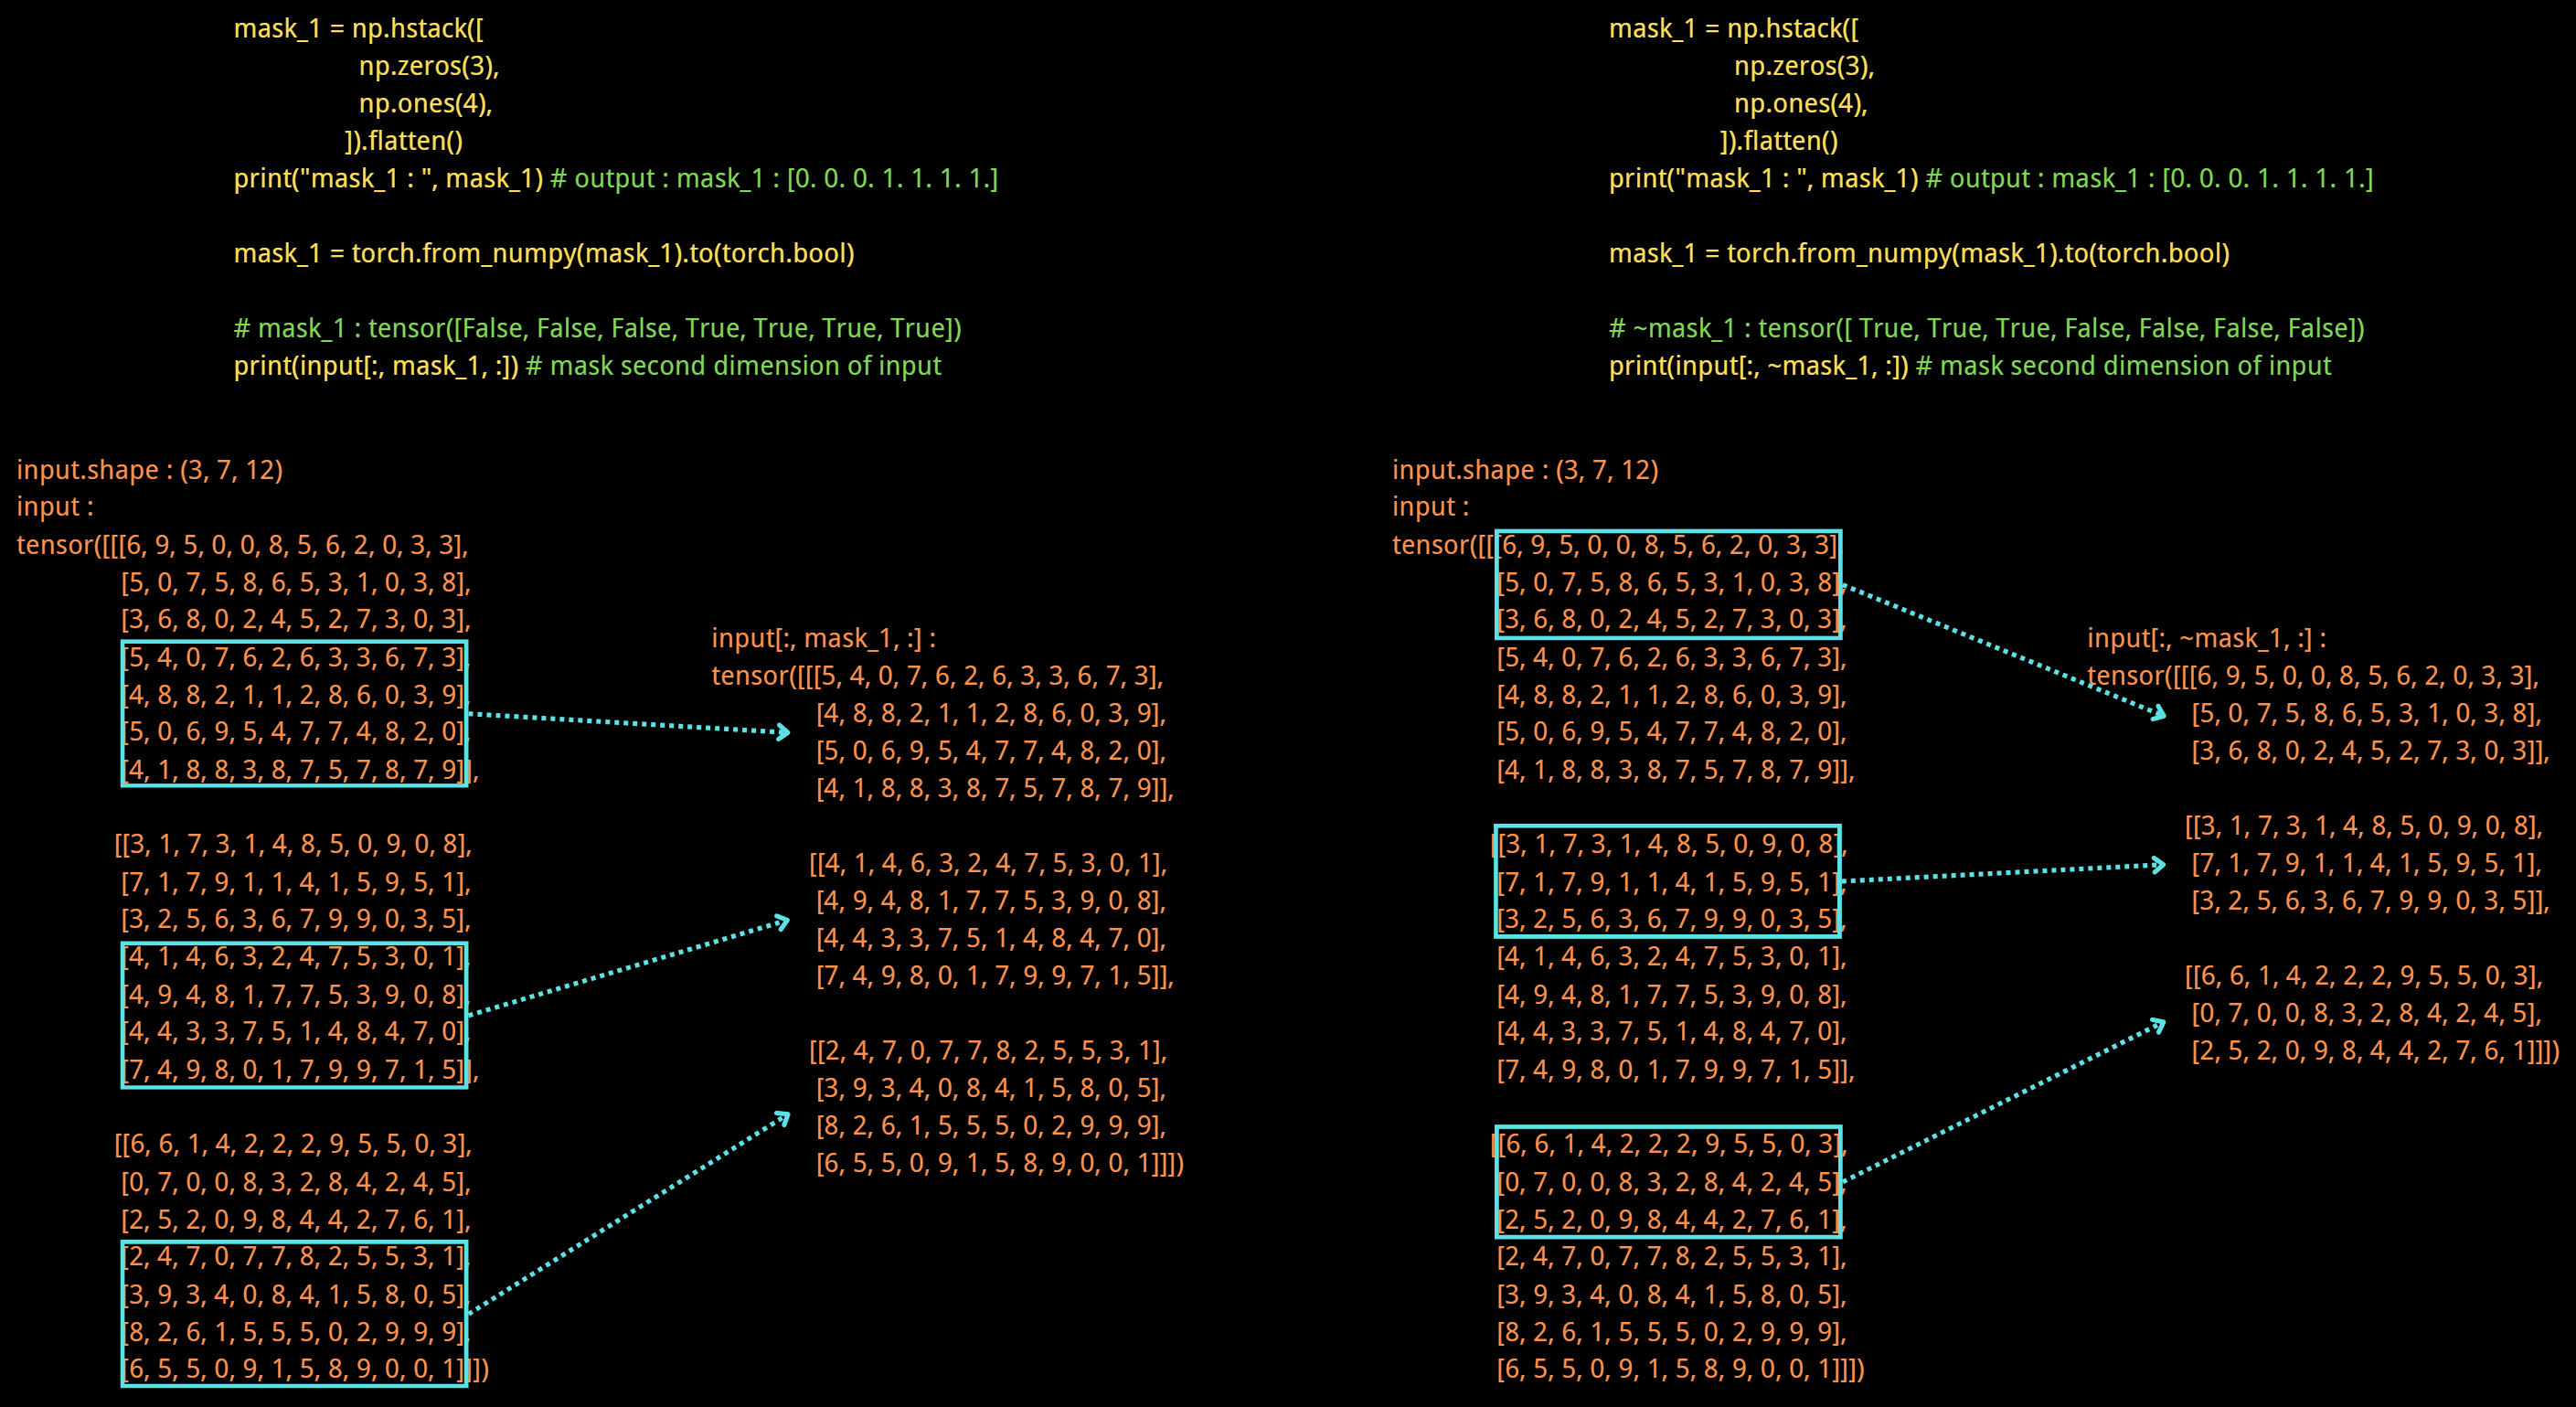

# Mask Second Dimension of Input

In [70]:
mask_2 = np.zeros(7)
print("mask_2 : ", mask_2)

mask_2 :  [0. 0. 0. 0. 0. 0. 0.]


In [71]:
mask_2 = torch.from_numpy(mask_2).to(torch.bool)
print("mask_2 : ", mask_2)
print("~mask_2 : ", ~mask_2)

mask_2 :  tensor([False, False, False, False, False, False, False])
~mask_2 :  tensor([True, True, True, True, True, True, True])


In [72]:
print("input[:, mask_2, :] : ")
print(input[:, mask_2, :]) # mask second dimension of input

input[:, mask_2, :] : 
tensor([], size=(3, 0, 12), dtype=torch.int64)


In [73]:
print("input[:, ~mask_2, :] : ")
print(input[:, ~mask_2, :]) # mask second dimension of input

input[:, ~mask_2, :] : 
tensor([[[6, 9, 5, 0, 0, 8, 5, 6, 2, 0, 3, 3],
         [5, 0, 7, 5, 8, 6, 5, 3, 1, 0, 3, 8],
         [3, 6, 8, 0, 2, 4, 5, 2, 7, 3, 0, 3],
         [5, 4, 0, 7, 6, 2, 6, 3, 3, 6, 7, 3],
         [4, 8, 8, 2, 1, 1, 2, 8, 6, 0, 3, 9],
         [5, 0, 6, 9, 5, 4, 7, 7, 4, 8, 2, 0],
         [4, 1, 8, 8, 3, 8, 7, 5, 7, 8, 7, 9]],

        [[3, 1, 7, 3, 1, 4, 8, 5, 0, 9, 0, 8],
         [7, 1, 7, 9, 1, 1, 4, 1, 5, 9, 5, 1],
         [3, 2, 5, 6, 3, 6, 7, 9, 9, 0, 3, 5],
         [4, 1, 4, 6, 3, 2, 4, 7, 5, 3, 0, 1],
         [4, 9, 4, 8, 1, 7, 7, 5, 3, 9, 0, 8],
         [4, 4, 3, 3, 7, 5, 1, 4, 8, 4, 7, 0],
         [7, 4, 9, 8, 0, 1, 7, 9, 9, 7, 1, 5]],

        [[6, 6, 1, 4, 2, 2, 2, 9, 5, 5, 0, 3],
         [0, 7, 0, 0, 8, 3, 2, 8, 4, 2, 4, 5],
         [2, 5, 2, 0, 9, 8, 4, 4, 2, 7, 6, 1],
         [2, 4, 7, 0, 7, 7, 8, 2, 5, 5, 3, 1],
         [3, 9, 3, 4, 0, 8, 4, 1, 5, 8, 0, 5],
         [8, 2, 6, 1, 5, 5, 5, 0, 2, 9, 9, 9],
         [6, 5, 5, 0, 9, 1, 5, 8

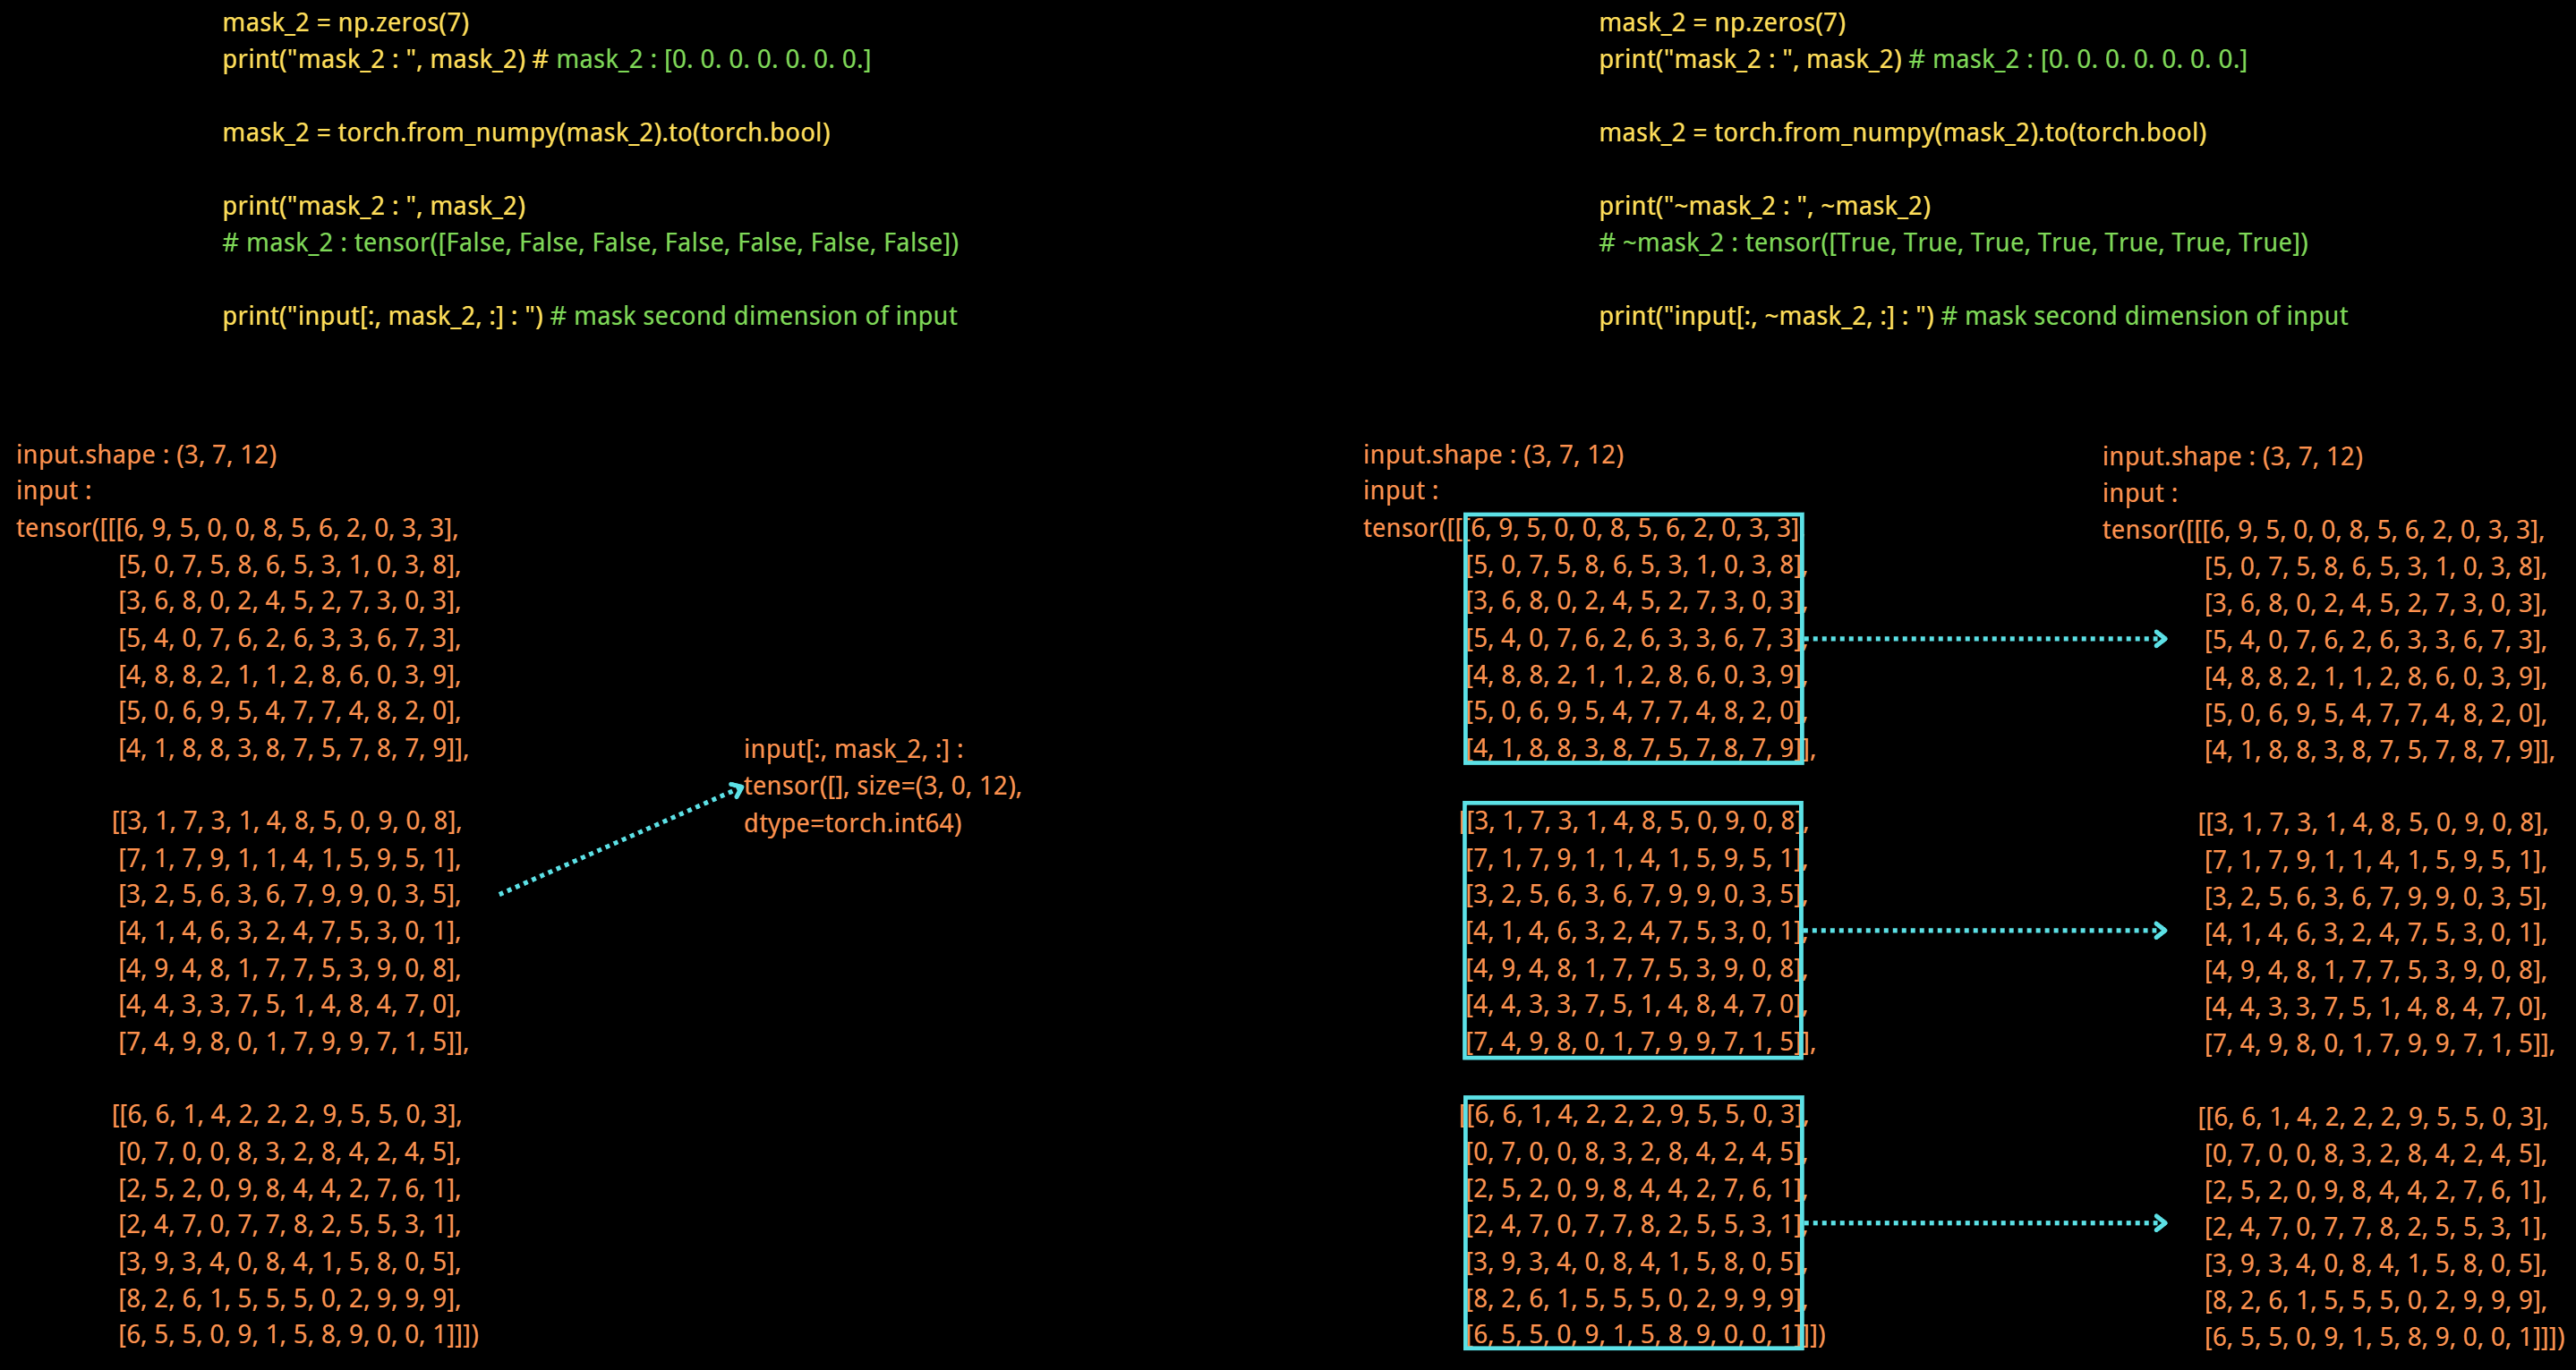

# Mask Thrid Dimension of Input

In [74]:
mask_3 = np.hstack([
                  np.zeros(7),
                  np.ones(5),
                ]).flatten()
print("mask_3 : ", mask_3)

mask_3 :  [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [75]:
mask_3 = torch.from_numpy(mask_3).to(torch.bool)
print("mask_3 : ", mask_3)
print("~mask_3 : ", ~mask_3)

mask_3 :  tensor([False, False, False, False, False, False, False,  True,  True,  True,
         True,  True])
~mask_3 :  tensor([ True,  True,  True,  True,  True,  True,  True, False, False, False,
        False, False])


In [76]:
print("input[:, :, mask_3] : ")
print(input[:, :, mask_3]) # mask thrid dimension of input

input[:, :, mask_3] : 
tensor([[[6, 2, 0, 3, 3],
         [3, 1, 0, 3, 8],
         [2, 7, 3, 0, 3],
         [3, 3, 6, 7, 3],
         [8, 6, 0, 3, 9],
         [7, 4, 8, 2, 0],
         [5, 7, 8, 7, 9]],

        [[5, 0, 9, 0, 8],
         [1, 5, 9, 5, 1],
         [9, 9, 0, 3, 5],
         [7, 5, 3, 0, 1],
         [5, 3, 9, 0, 8],
         [4, 8, 4, 7, 0],
         [9, 9, 7, 1, 5]],

        [[9, 5, 5, 0, 3],
         [8, 4, 2, 4, 5],
         [4, 2, 7, 6, 1],
         [2, 5, 5, 3, 1],
         [1, 5, 8, 0, 5],
         [0, 2, 9, 9, 9],
         [8, 9, 0, 0, 1]]])


In [77]:
print("input[:, :, ~mask_3] : ")
print(input[:, :, ~mask_3]) # mask thrid dimension of input

input[:, :, ~mask_3] : 
tensor([[[6, 9, 5, 0, 0, 8, 5],
         [5, 0, 7, 5, 8, 6, 5],
         [3, 6, 8, 0, 2, 4, 5],
         [5, 4, 0, 7, 6, 2, 6],
         [4, 8, 8, 2, 1, 1, 2],
         [5, 0, 6, 9, 5, 4, 7],
         [4, 1, 8, 8, 3, 8, 7]],

        [[3, 1, 7, 3, 1, 4, 8],
         [7, 1, 7, 9, 1, 1, 4],
         [3, 2, 5, 6, 3, 6, 7],
         [4, 1, 4, 6, 3, 2, 4],
         [4, 9, 4, 8, 1, 7, 7],
         [4, 4, 3, 3, 7, 5, 1],
         [7, 4, 9, 8, 0, 1, 7]],

        [[6, 6, 1, 4, 2, 2, 2],
         [0, 7, 0, 0, 8, 3, 2],
         [2, 5, 2, 0, 9, 8, 4],
         [2, 4, 7, 0, 7, 7, 8],
         [3, 9, 3, 4, 0, 8, 4],
         [8, 2, 6, 1, 5, 5, 5],
         [6, 5, 5, 0, 9, 1, 5]]])


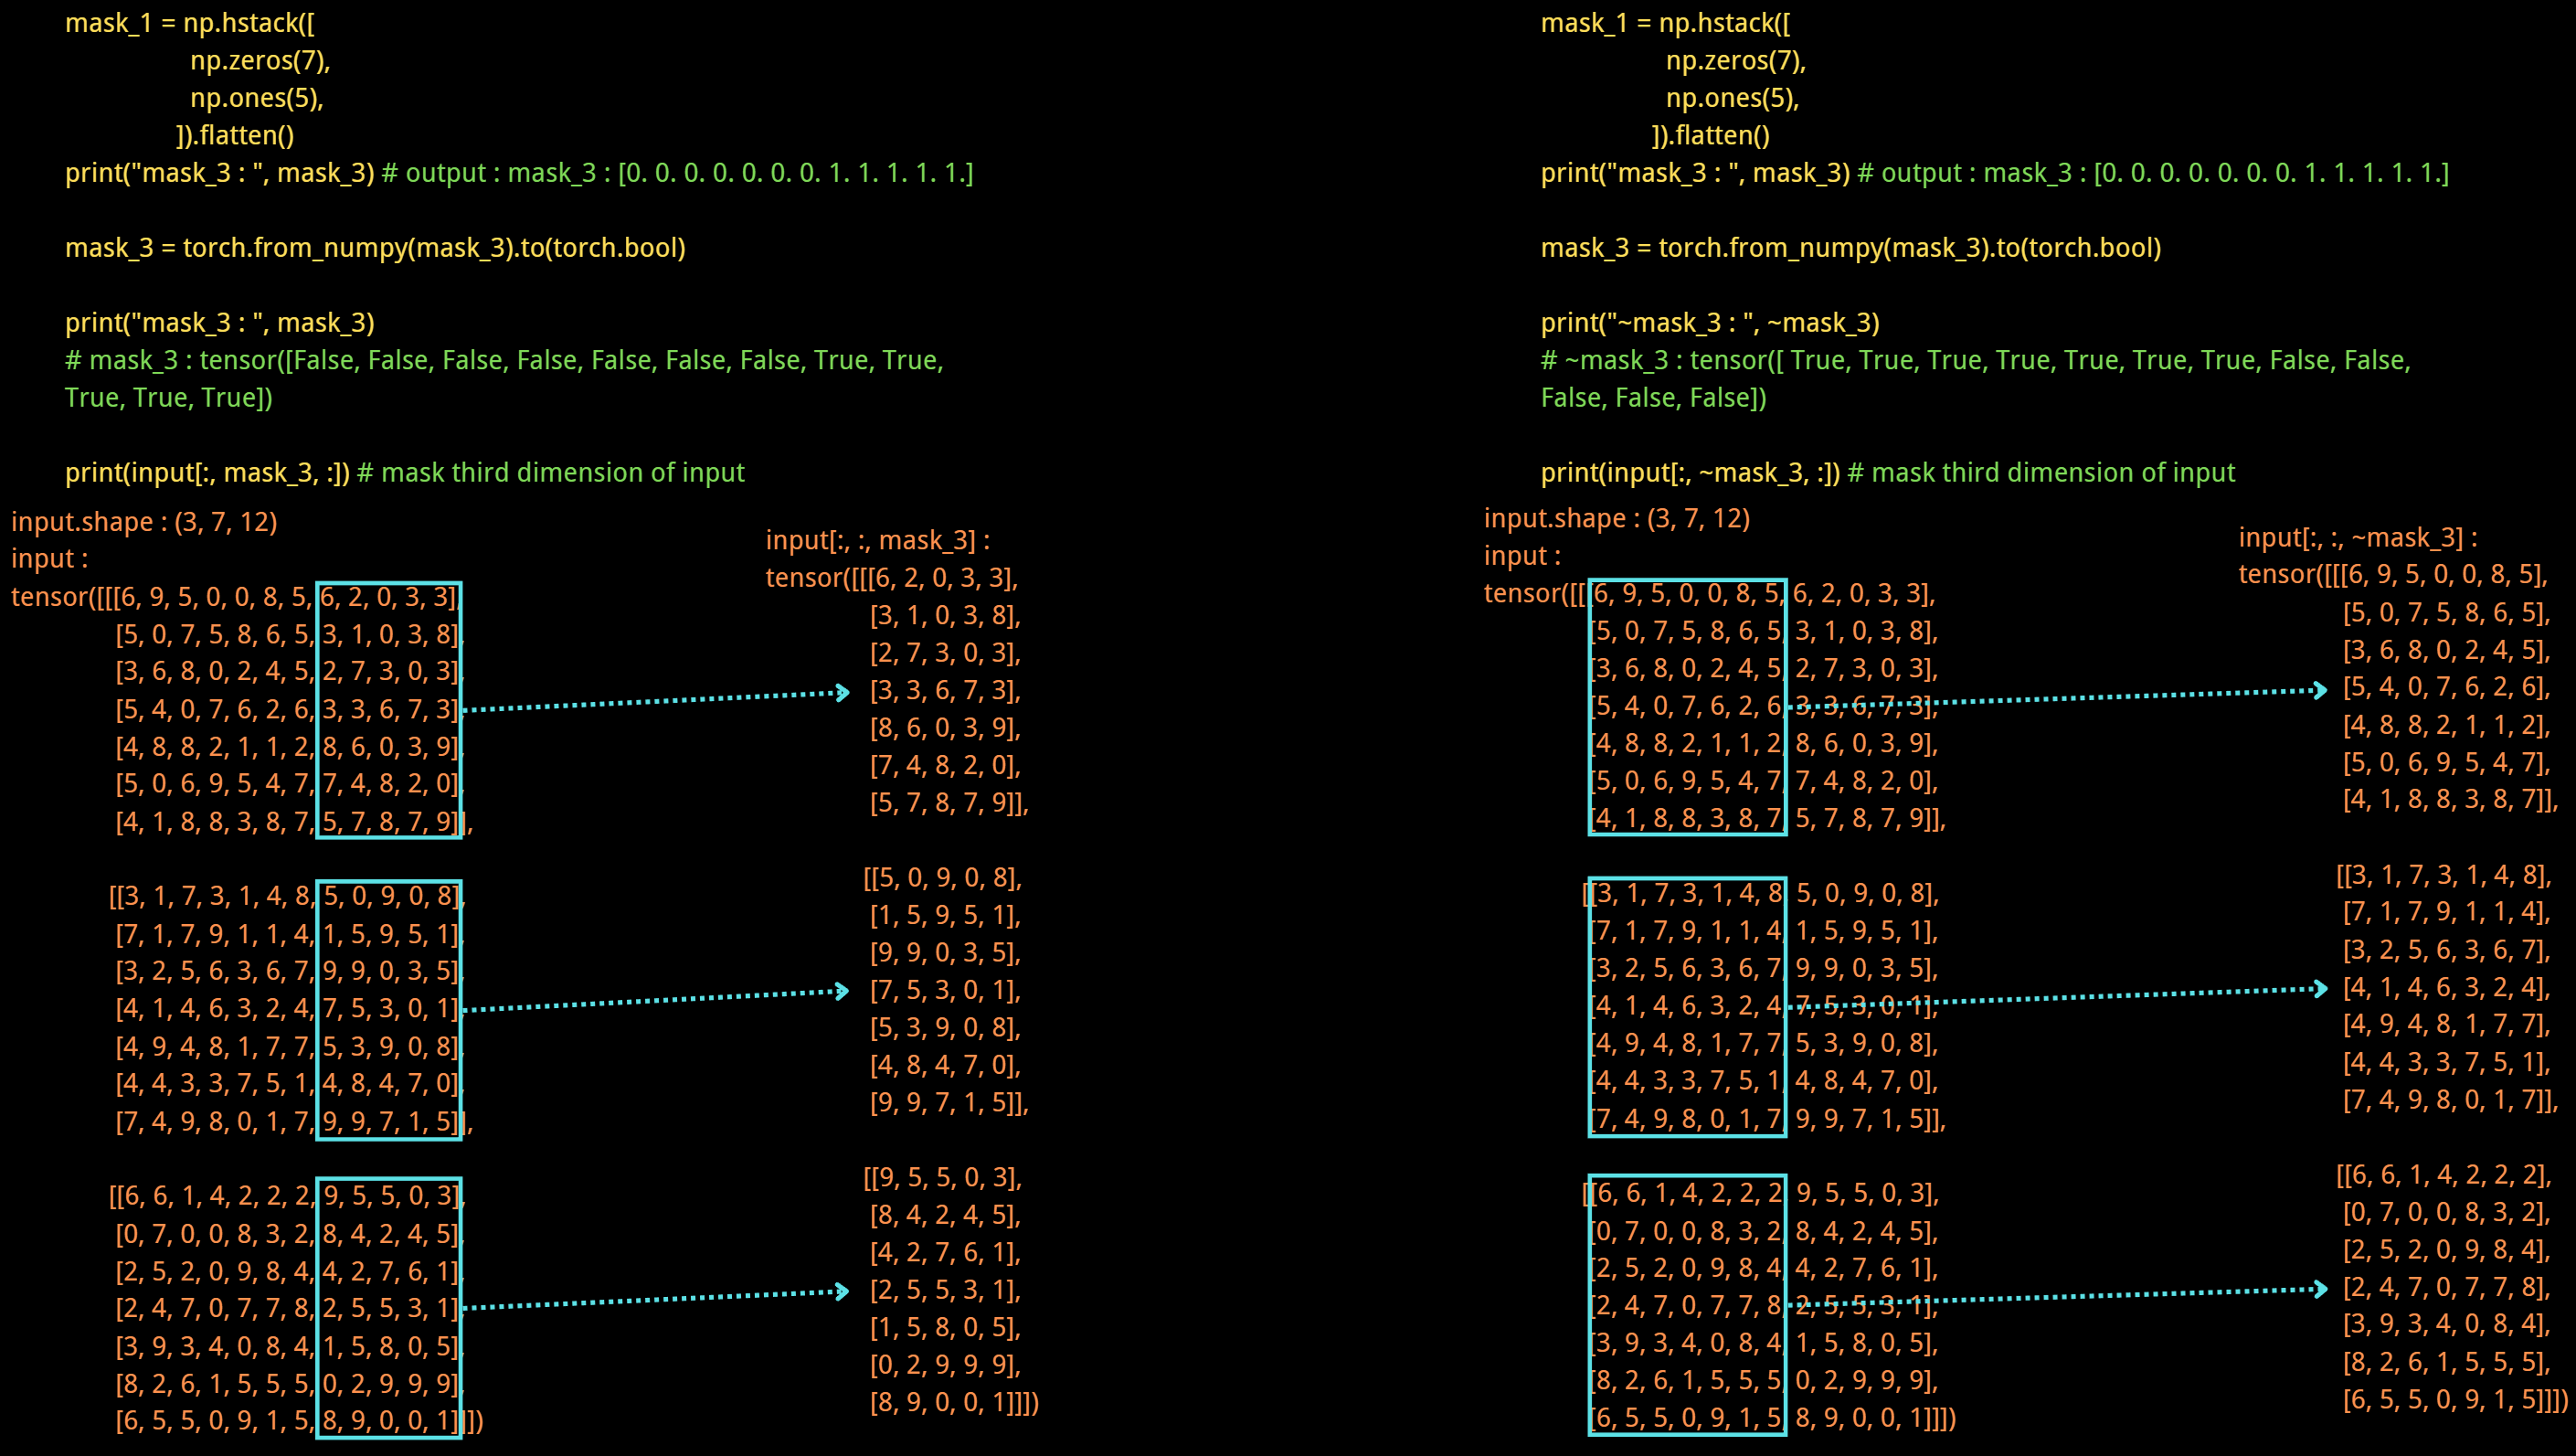

# Mask First Dimension of Input

In [78]:
mask_4 = np.hstack([
                  np.zeros(1),
                  np.ones(2),
                ]).flatten()
print("mask_4 : ", mask_4)

mask_4 :  [0. 1. 1.]


In [79]:
mask_4 = torch.from_numpy(mask_4).to(torch.bool)
print("mask_4 : ", mask_4)
print("~mask_4 : ", ~mask_4)

mask_4 :  tensor([False,  True,  True])
~mask_4 :  tensor([ True, False, False])


In [80]:
print("input[mask_4, :, :] : ")
print(input[mask_4, :, :]) # mask first dimension of input

input[mask_4, :, :] : 
tensor([[[3, 1, 7, 3, 1, 4, 8, 5, 0, 9, 0, 8],
         [7, 1, 7, 9, 1, 1, 4, 1, 5, 9, 5, 1],
         [3, 2, 5, 6, 3, 6, 7, 9, 9, 0, 3, 5],
         [4, 1, 4, 6, 3, 2, 4, 7, 5, 3, 0, 1],
         [4, 9, 4, 8, 1, 7, 7, 5, 3, 9, 0, 8],
         [4, 4, 3, 3, 7, 5, 1, 4, 8, 4, 7, 0],
         [7, 4, 9, 8, 0, 1, 7, 9, 9, 7, 1, 5]],

        [[6, 6, 1, 4, 2, 2, 2, 9, 5, 5, 0, 3],
         [0, 7, 0, 0, 8, 3, 2, 8, 4, 2, 4, 5],
         [2, 5, 2, 0, 9, 8, 4, 4, 2, 7, 6, 1],
         [2, 4, 7, 0, 7, 7, 8, 2, 5, 5, 3, 1],
         [3, 9, 3, 4, 0, 8, 4, 1, 5, 8, 0, 5],
         [8, 2, 6, 1, 5, 5, 5, 0, 2, 9, 9, 9],
         [6, 5, 5, 0, 9, 1, 5, 8, 9, 0, 0, 1]]])


In [81]:
print("input[~mask_4, :, :] : ")
print(input[~mask_4, :, :]) # mask first dimension of input

input[~mask_4, :, :] : 
tensor([[[6, 9, 5, 0, 0, 8, 5, 6, 2, 0, 3, 3],
         [5, 0, 7, 5, 8, 6, 5, 3, 1, 0, 3, 8],
         [3, 6, 8, 0, 2, 4, 5, 2, 7, 3, 0, 3],
         [5, 4, 0, 7, 6, 2, 6, 3, 3, 6, 7, 3],
         [4, 8, 8, 2, 1, 1, 2, 8, 6, 0, 3, 9],
         [5, 0, 6, 9, 5, 4, 7, 7, 4, 8, 2, 0],
         [4, 1, 8, 8, 3, 8, 7, 5, 7, 8, 7, 9]]])


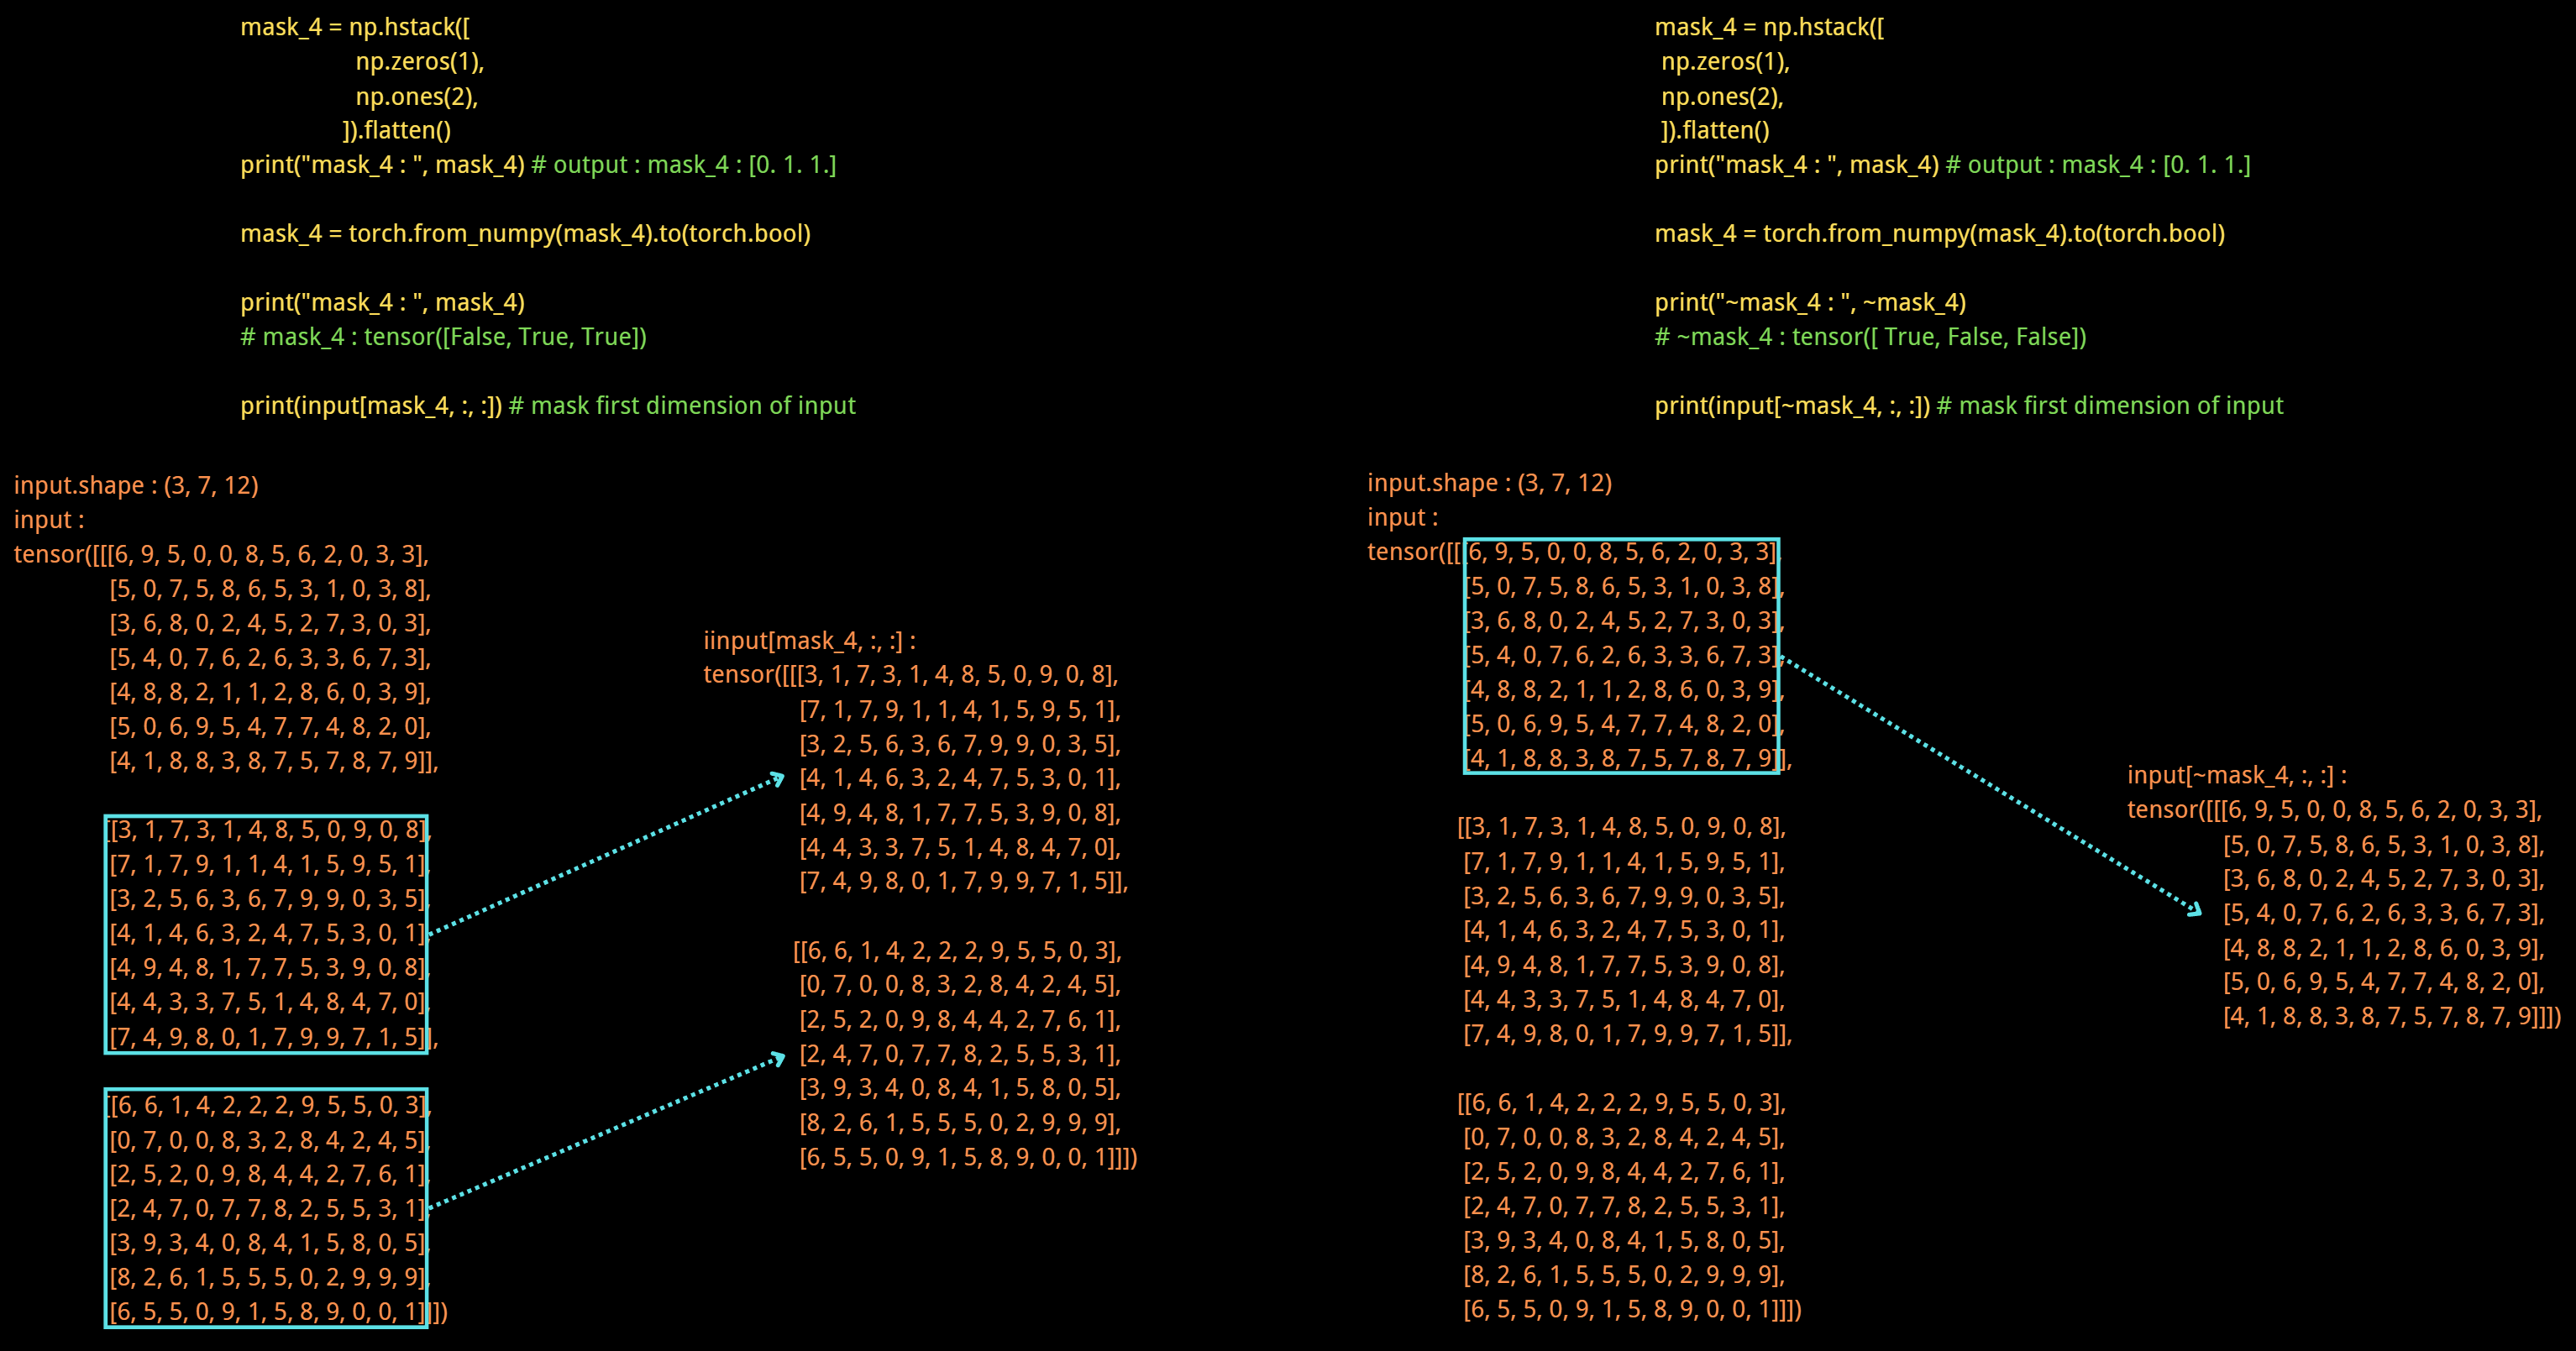